In [1]:
# Imports 
import os
import sys
sys.path.append("..")
os.environ["pyna_language"] = 'python'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline
from pyNA.pyna import pyna

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Load verification trajectory
traj_nasa_std = pd.read_csv('../cases/nasa_stca_standard/trajectory/Trajectory_to.csv')
engine_nasa_std = pd.read_csv('../cases/nasa_stca_standard/engine/Engine_to.csv')

In [3]:
pyna_settings = pyna.load_settings(case_name='stca')
pyna_settings.engine_file_name = 'engine_deck_stca.csv'
pyna_settings.TS_to = 0.88
pyna_settings.TS_vnrs = 0.88

pyna_settings.TS_cutback = 0.61
pyna_settings.z_cutback = traj_nasa_std['Z [m]'][np.where(traj_nasa_std['TS [-]'] < 0.65)[0][0]]

pyna_settings.max_iter = 100

pyna_settings.PKROT = True

py = pyna(settings=pyna_settings)
py.ac.z_max = traj_nasa_std['Z [m]'].values[-1]
py.ac.v_max = traj_nasa_std['V [m/s]'].values[-1]
py.ac.k_rot = 1.27

py.compute_trajectory(objective='t_end')

/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/utils/options_dictionary.py:332: OMDeprecationWarning:'gradient method' is not a valid python name and will become an invalid option name in a future release. You can prevent this warning (and future exceptions) by declaring this option using a valid python name.


--- Linkage Report [phases] ---
    --- groundroll - rotation ---
        time           [final] ==  time           [initial]
        states:x       [final] ==  states:x       [initial]
        states:v       [final] ==  states:v       [initial]
        states:alpha   [final] ==  states:alpha   [initial]
    --- rotation - liftoff ---
        time               [final] ==  time             [initial]
        states:x           [final] ==  states:x         [initial]
        parameters:z       [final*] ==  states:z         [initial]
        states:v           [final] ==  states:v         [initial]
        states:alpha       [final] ==  controls:alpha   [initial]
        parameters:gamma   [final*] ==  states:gamma     [initial]
    --- liftoff - vnrs ---
        time             [final] ==  time             [initial]
        states:x         [final] ==  states:x         [initial]
        states:v         [final] ==  states:v         [initial]
        controls:alpha   [final] ==  controls:

/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/recorders/sqlite_recorder.py:224: UserWarning:The existing case recorder file, dymos_solution.db, is being overwritten.


Model viewer data has already has already been recorded for Driver.
Full total jacobian was computed 3 times, taking 7.154677 seconds.
Total jacobian shape: (291, 179) 


Jacobian shape: (291, 179)  ( 3.68% nonzero)
FWD solves: 11   REV solves: 0
Total colors vs. total size: 11 vs 179  (93.9% improvement)

Sparsity computed using tolerance: 1e-12
Time to compute sparsity: 7.154677 sec.
Time to compute coloring: 0.250910 sec.


Optimization Problem -- Optimization using pyOpt_sparse
    Objective Function: _objfunc

    Solution: 
--------------------------------------------------------------------------------
    Total Time:                   20.2941
       User Objective Time :       2.4992
       User Sensitivity Time :    15.9922
       Interface Time :            1.6049
       Opt Solver Time:            0.1979
    Calls to Objective Function :      31
    Calls to Sens Function :           31


   Objectives
      Index  Name                      Value          Optimum
          0

True

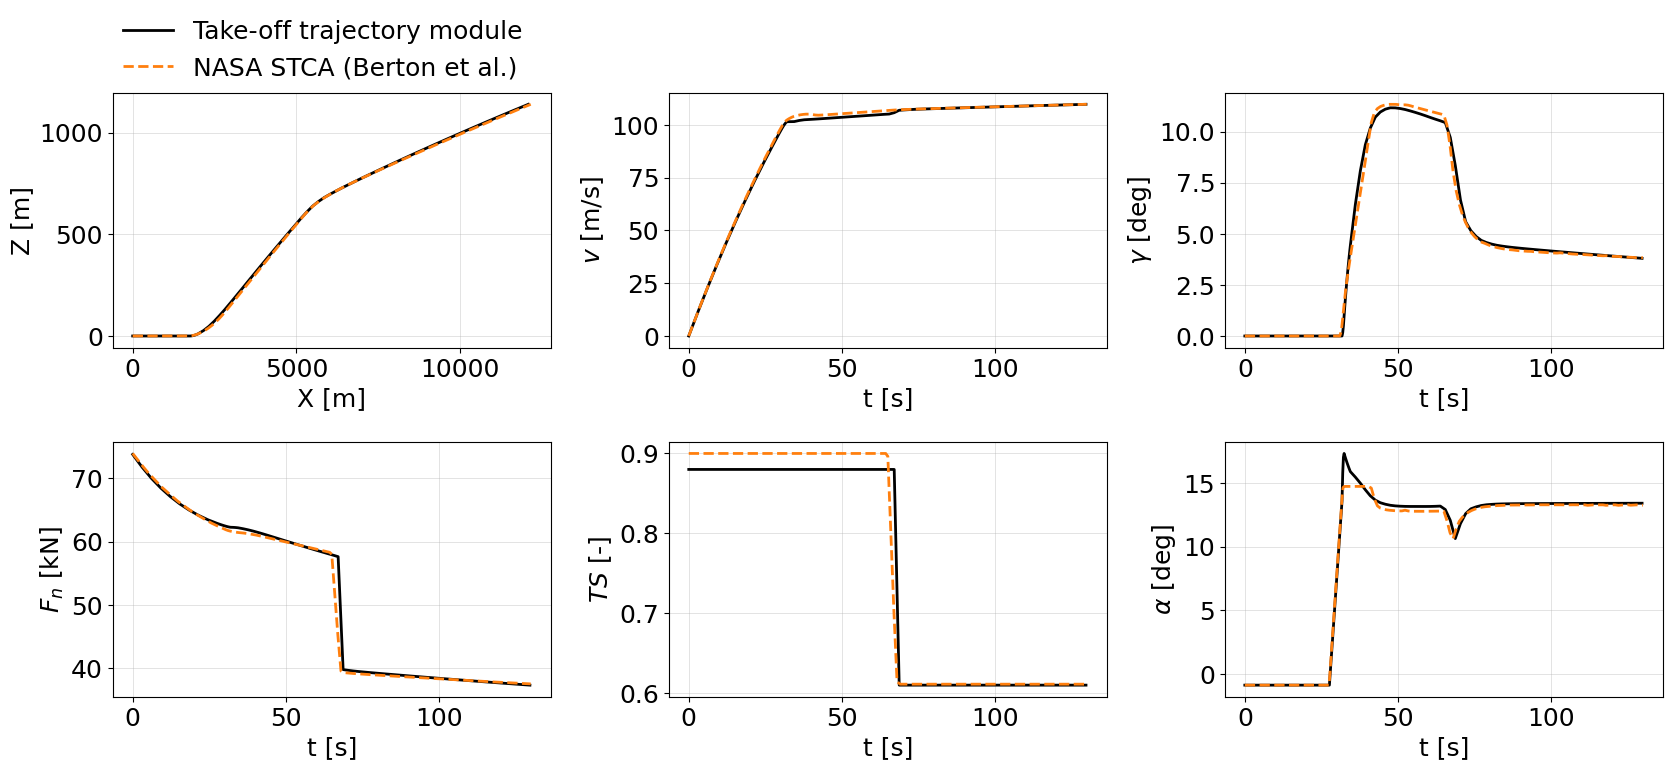

In [5]:
py.plot_trajectory(py.problem, traj_nasa_std)

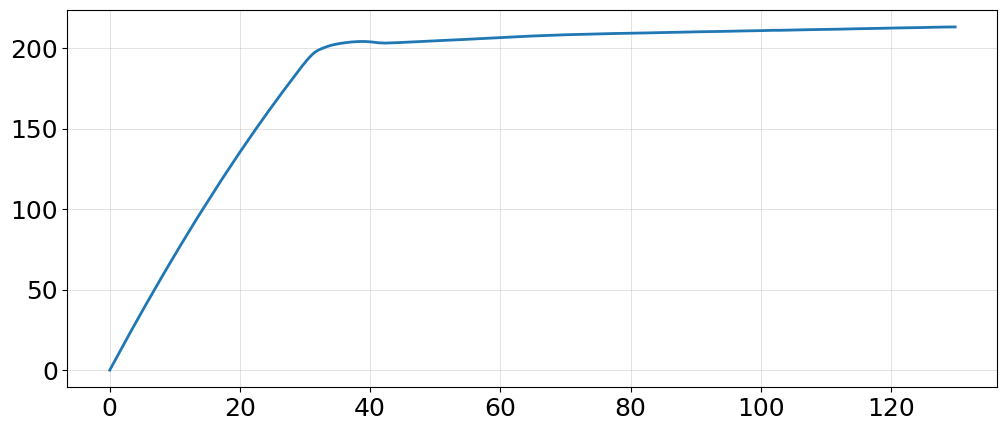

In [8]:
plt.plot(traj_nasa_std['t_source [s]'], traj_nasa_std['V [m/s]']/0.514444)